# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage import img_as_float
from ipywidgets import *
from traitlets import dlink
from skimage.morphology import erosion , dilation , opening , closing
from skimage.morphology import disk
from skimage import filters
from skimage.transform import rescale
from skimage.measure import label , regionprops

Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

In [2]:
path = './images/'
Image_name ='FindingContours.png'
Contours = io.imread(path.__add__(Image_name))
Contours_im_float = img_as_float(Contours)

Image__coins ='coins.jpg'
coins = io.imread(path.__add__(Image__coins))
coins_ubyte = img_as_ubyte(coins)


In [3]:
def image_erosion(x):
    im_erosion = erosion(Contours_im_float,disk(x))
    io.imshow(im_erosion)
    

interact(image_erosion, x=(1,20));


interactive(children=(IntSlider(value=10, description='x', max=20, min=1), Output()), _dom_classes=('widget-interact',))

** Q.1.2 Dilation **

In [4]:
def image_dilation(x):
    im_dilation = dilation(Contours_im_float,disk(x))
    io.imshow(im_dilation)
    

interact(image_dilation , x =(1,20));


interactive(children=(IntSlider(value=10, description='x', max=20, min=1), Output()), _dom_classes=('widget-interact',))

** Q.1.3 Opening **

In [5]:
def image_opening(x):
    im_opening = opening(Contours_im_float,disk(x))
    io.imshow(im_opening)
    

interact(image_opening , x=(1,20));

interactive(children=(IntSlider(value=10, description='x', max=20, min=1), Output()), _dom_classes=('widget-interact',))

** Q.1.4 Closing**

In [6]:
def image_closing(x):
    im_closing = closing(Contours_im_float,disk(x))
    io.imshow(im_closing)
    

interact(image_closing , x=(1,20));

interactive(children=(IntSlider(value=10, description='x', max=20, min=1), Output()), _dom_classes=('widget-interact',))

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/home/eljazri/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


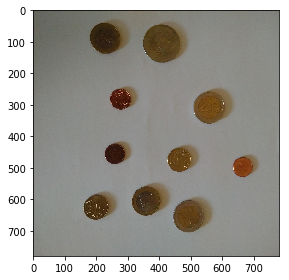

In [7]:

coins_rescaled = rescale(coins_ubyte, 1.0 / 4.0)

plt.figure()
io.imshow(coins_rescaled)

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

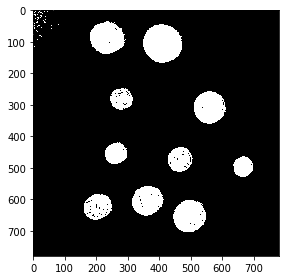

In [8]:
coins_gray = rgb2gray(coins_rescaled)
threshold = filters.threshold_otsu(coins_gray)
coins_threshold = coins_gray < threshold
plt.figure()

io.imshow(coins_threshold)



**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

In [9]:
def inter_morphological_operations(x, method):
    if method == 'erosion':
        morphological_img = erosion(coins_threshold,disk(x))
    elif method == 'dilation':
        morphological_img = dilation(coins_threshold,disk(x))
    elif method == 'opening':
        morphological_img = opening(coins_threshold,disk(x))
    elif method == 'closing':
        morphological_img = closing(coins_threshold,disk(x))
    plt.figure(figsize=(7,7))
    plt.imshow(morphological_img,cmap='gray')
    plt.title('morphological operations interact with diffrent disk size')
    

interact(inter_morphological_operations , x=(1,20) , method =[('erosion','erosion'),('dilation','dilation'),
                                                  ('opening','opening'),('closing','closing')] ) 




interactive(children=(IntSlider(value=10, description='x', max=20, min=1), Dropdown(description='method', options=(('erosion', 'erosion'), ('dilation', 'dilation'), ('opening', 'opening'), ('closing', 'closing')), value='erosion'), Output()), _dom_classes=('widget-interact',))

<function inter_morphological_operations at 0x7ff81369ab70>

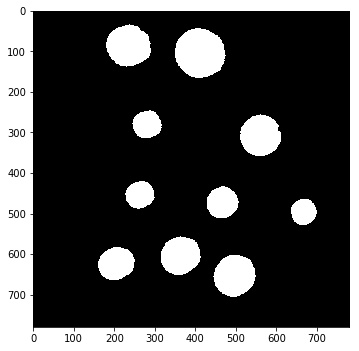

In [10]:
clean_coins = closing(coins_threshold,disk(1))
clean_coins = opening(clean_coins,disk(4))

plt.figure(figsize=(5,5))
io.imshow(clean_coins)


**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


/home/eljazri/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


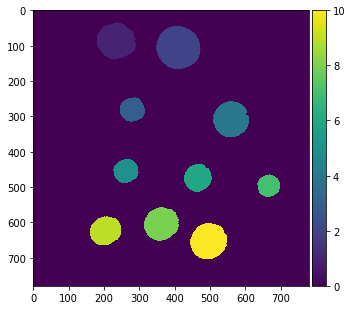

In [11]:
from skimage.draw import circle

labeled_coins = label(clean_coins,connectivity=1)
coins_regia_props =  regionprops(labeled_coins)
plt.figure(figsize=(5,5))
io.imshow(labeled_coins)



### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

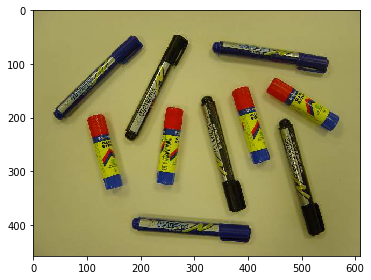

In [30]:
from skimage.transform import resize
filename = './images/objets4.jpg'
img = io.imread(filename)
img = img_as_ubyte(img)

io.imshow(img)

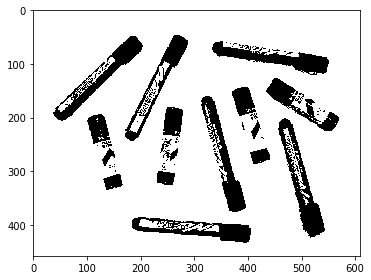

In [31]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
img = rgb2gray(img)
t = threshold_otsu(img)
mask = img>t
io.imshow(mask)

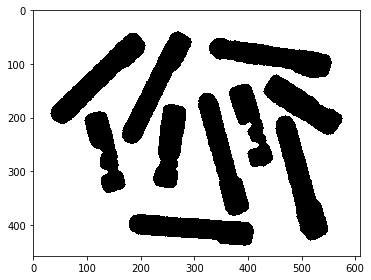

In [32]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
img = rgb2gray(img)
t = threshold_otsu(img)
mask = img>t

mask1 = erosion(mask, disk(6))
mask2 = opening(mask1, disk(4))
mask3 = closing(mask2, disk(9))

io.imshow(mask3)

/home/eljazri/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


The number of regions is: 10


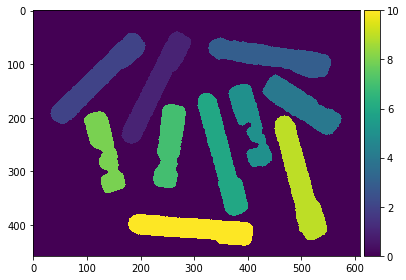

In [33]:
img_label = label(mask3, background = True)
regions = regionprops(img_label)

io.imshow(img_label)

print('The number of regions is: {}'.format(len(regions)))

In [145]:
sum_len = 0
for idx,region in enumerate(regions):
    length = region.major_axis_length
    sum_len = sum_len + length
    print('The length of the object is {:.0f} pxs'.format(length))
    print('The area of the region is {:.0f} pxs'.format(region.convex_area))
mean_len = sum_len / (len(regions))
markers = sum (region.major_axis_length > mean_len for idx,region in enumerate(regions))
glues = (len(regions)) - markers
print('The number of markers is {}'.format(markers))
print('The number of glues is {}'.format(glues))

The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs

The length of the object is 19 pxs
The area of the region is 271 pxs
The length of the object is 20 pxs
The area of the region is 255 pxs
The length of the object is 20 pxs
The area of the region is 303 pxs
The length of the object is 21 pxs
The area of the region is 311 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 272 pxs
The length of the object is 20 pxs
The area of the region is 272 pxs
The length of the object is 21 pxs
The area of the region is 326 pxs
The length of the object is 21 pxs
The area of the region is 292 pxs
The length of the object is 21 pxs
The area of the region is 327 pxs
The length of the object is 21 pxs
The area of the region is 323 pxs
The length of the object is 21 pxs
The area of the region is 318 pxs
The length of the object is 21 pxs
The area of the region is 312 pxs
The length of the object is 21 pxs

The length of the object is 20 pxs
The area of the region is 272 pxs
The length of the object is 20 pxs
The area of the region is 276 pxs
The length of the object is 20 pxs
The area of the region is 300 pxs
The length of the object is 21 pxs
The area of the region is 323 pxs
The length of the object is 20 pxs
The area of the region is 297 pxs
The length of the object is 21 pxs
The area of the region is 293 pxs
The length of the object is 21 pxs
The area of the region is 311 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs

The area of the region is 294 pxs
The length of the object is 21 pxs
The area of the region is 318 pxs
The length of the object is 21 pxs
The area of the region is 286 pxs
The length of the object is 21 pxs
The area of the region is 290 pxs
The length of the object is 21 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
The length of the object is 20 pxs
The area of the region is 289 pxs
